In [1]:
import numpy as np
import matplotlib.pyplot as plt

POINTS = 500


def f(x):
    return np.sin(2*x) * np.sin(x**2/np.pi)


def simple_wage(x):
    return 1


def monomial_base(i):
    return lambda x: x**i


def trigonometrical_base(i):
    k = (i + 1) // 2
    if i % 2 == 1:
        return lambda x: np.sin(k * (x * 2 / 3 + np.pi))
    return lambda x: np.cos(k * (x * 2 / 3 + np.pi))


def calculate_matrix_elem(row, col, x_arr, wage_fun, base_generator):
    fi_k = base_generator(row)
    fi_j = base_generator(col)
    return np.sum(wage_fun(x_arr) * fi_k(x_arr) * fi_j(x_arr))


def calculate_vector_elem(row, x_arr, y_arr, wage_fun, base_generator):
    fi_k = base_generator(row)
    return np.sum(wage_fun(x_arr) * y_arr * fi_k(x_arr))


def generate_eq_sys_matrix(m, x_arr, wage_fun, base_generator):
    result = np.empty((m,m))
    for i in range(m):
        for j in range(m):
            result[i][j] = calculate_matrix_elem(i, j, x_arr, wage_fun, base_generator)
    return result


def generate_eq_sys_dependent_vector(m, x_arr, y_arr, wage_fun, base_generator):
    result = np.empty((m,))
    for i in range(m):
        result[i] = calculate_vector_elem(i, x_arr, y_arr, wage_fun, base_generator)
    return result


def compute_a_coeff(m, x_arr, y_arr, wage_fun, base_generator):
    g = generate_eq_sys_matrix(m, x_arr, wage_fun, base_generator)
    b = generate_eq_sys_dependent_vector(m, x_arr, y_arr, wage_fun, base_generator)
    return np.linalg.solve(g, b)


def calculate_errors(y_print, p_print):
    eukl_norm = np.linalg.norm(y_print - p_print) / POINTS
    max_norm = np.linalg.norm(y_print - p_print, ord=np.inf)
    return eukl_norm, max_norm


def print_errors(eukl, max):
    print('Błąd aproksymacji(norma euklidesowa):', eukl)
    print('Błąd aproksymacji(norma maksimum):', max)


def print_plots(x_approx, x_print, y_approx, y_print, p_print, plot_name):
    fig, ax = plt.subplots()
    ax.plot(x_print, p_print, label="W(x)")
    ax.plot(x_print, y_print, label="f(x)")
    ax.plot(x_approx, y_approx, '*', label='Węzły aproksymacji')
    ax.set_title(plot_name)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend()
    plt.tight_layout()
    plt.show()


def evaluate_approximation_polynomial(x, a_coeff, base):
    m = len(a_coeff)
    values = [] #np.empty((m,))
    for i in range(m):
        monomial = base(i)
        value = a_coeff[i] * monomial(x)
        values.append(value) # = evaluate_fun(monomial, x)
    return sum(values)


def approximate(m, x_print, x_approx, y_approx, wage_fun, base_generator):
    a = compute_a_coeff(m, x_approx, y_approx, wage_fun, base_generator)
    return evaluate_approximation_polynomial(x_print, a, base_generator)


def exercise(a, b, n, m, wage, base):
    if base == trigonometrical_base:
        plot_name = "Liczba f. trygonometrycznych (m): {0:d}, liczba węzłów (n): {1:d}".format(m, n)
    else:
        plot_name = "Stopień wielomianu (m): {0:d}, liczba węzłów (n): {1:d}".format(m, n)
    m = m + 1
    print(plot_name)
    x_approx = np.linspace(a, b, n)
    x_print = np.linspace(a, b, POINTS)
    y_approx = f(x_approx)
    y_print = f(x_print)
    p_print = approximate(m, x_print, x_approx, y_approx, wage_fun=wage, base_generator=base)
    eukl_n, max_n = calculate_errors(y_print, p_print)
    print_errors(eukl_n, max_n)
    print_plots(x_approx, x_print, y_approx, y_print, p_print, plot_name)
    return eukl_n, max_n

In [2]:
def exercise_polynomial(m):
    a = -np.pi
    b = 2 * np.pi
    eukl_errors = {}
    max_errors = {}
    for n in range(20, 61, 20):
        eukl_n, max_n = exercise(a, b, n, m, simple_wage, monomial_base)
        eukl_errors[n] = eukl_n
        max_errors[n] = max_n
    polynomial_errors = {'Eukl': eukl_errors, 'Max': max_errors}
    return polynomial_errors


def exercise_trigonometrical(m):
    a = -np.pi
    b = 2 * np.pi
    eukl_errors = {}
    max_errors = {}
    for n in range(30, 101, 30):
        eukl_n, max_n = exercise(a, b, n, m, simple_wage, trigonometrical_base)
        eukl_errors[n] = eukl_n
        max_errors[n] = max_n
    polynomial_errors = {'Eukl': eukl_errors, 'Max': max_errors}
    return polynomial_errors


def exercise_1():
    errors = {}
    for m in range(1, 11):
        errors[m] = exercise_polynomial(m)
    return errors


def exercise_2():
    errors = {}
    for m in range(1, 26):
        errors[m] = exercise_trigonometrical(m)
    return errors

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#plt.close('all')
data = {}


def read_data():
    polynomial_errors = exercise_1()
    # cubic = exercise_2()
    polynomial_data = {}
    outside = [] #list(polynomial_errors.keys())
    for key in polynomial_errors[2]['Eukl'].keys():
        outside += list(polynomial_errors.keys())
    outside.sort()
    inside = []
    for key in polynomial_errors.keys():
        inside += polynomial_errors[key]['Eukl'].keys()
    hier_index = list(zip(outside, inside))
    hier_index = pd.MultiIndex.from_tuples(hier_index)
    print(outside, inside)
    print(list(zip(outside, inside)))
    print(hier_index)
    #for key in polynomial_errors.keys():
    #    polynomial_data[key] = pd.DataFrame(polynomial_errors[key])
    data['Polynomial'] = pd.DataFrame(polynomial_data, index=hier_index)
    print(data['Polynomial'])
    # data['Cubic'] = pd.DataFrame(cubic)


def write_excel():
    writer = pd.ExcelWriter('Errors.xlsx')
    for (name, df) in data.items():
        df.to_excel(writer, name)
    writer.save()


def plot_errors(method):
    df = data[method]
    x = df.index.values
    eukl = df['Eukl'].values
    max = df['Max'].values
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(method)
    axes[0].plot(x, eukl, '.')
    axes[1].plot(x, max, '.')
    for i in range(2):
        axes[i].set_title('Norma ' + repr(i + 1))
        axes[i].set_xlabel('n')
        axes[i].set_ylabel('norm(W(x)-f(x))')
    plt.show()


def do_all():
    read_data()
    write_excel()
    plot_errors()


Stopień wielomianu (m): 1, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.02033513767839565
Błąd aproksymacji(norma maksimum): 1.078776037580913


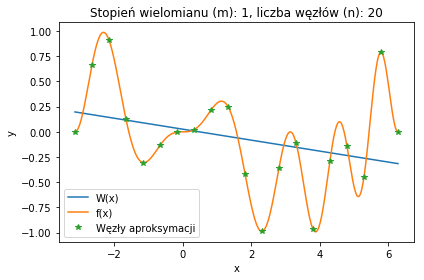

Stopień wielomianu (m): 1, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.02031532916744054
Błąd aproksymacji(norma maksimum): 1.0980124429801976


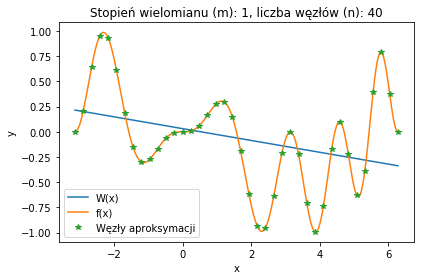

Stopień wielomianu (m): 1, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.02031148730588042
Błąd aproksymacji(norma maksimum): 1.1048296626508556


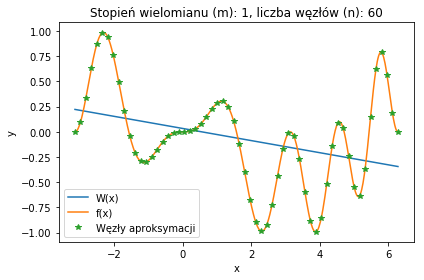

Stopień wielomianu (m): 2, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.01752515255169051
Błąd aproksymacji(norma maksimum): 0.8046789732881344


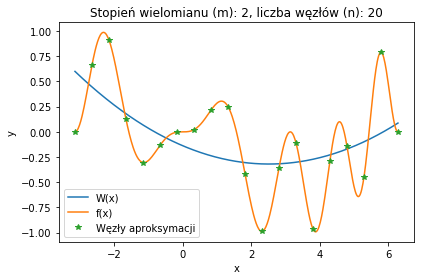

Stopień wielomianu (m): 2, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.017401223899400194
Błąd aproksymacji(norma maksimum): 0.7789595609584038


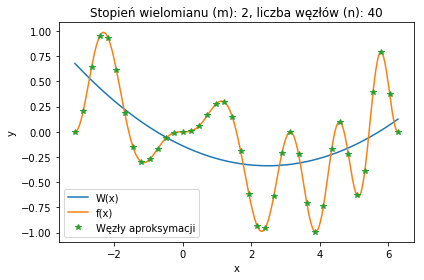

Stopień wielomianu (m): 2, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.017376979472195218
Błąd aproksymacji(norma maksimum): 0.7698393776246543


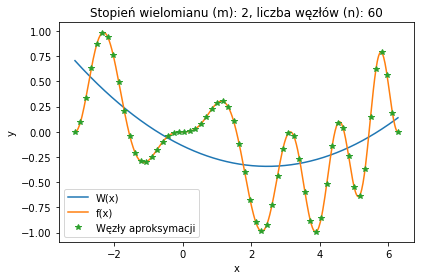

Stopień wielomianu (m): 3, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.016501813795510165
Błąd aproksymacji(norma maksimum): 0.710335703420224


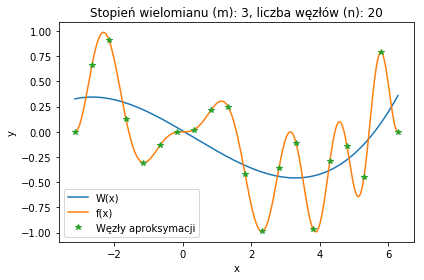

Stopień wielomianu (m): 3, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.01639040520592498
Błąd aproksymacji(norma maksimum): 0.6588710699715821


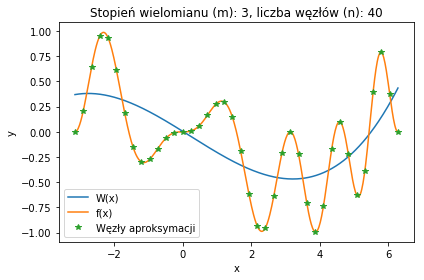

Stopień wielomianu (m): 3, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.016368839744097564
Błąd aproksymacji(norma maksimum): 0.6412106999042151


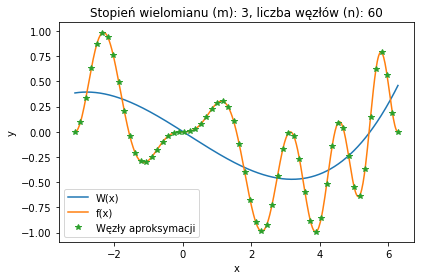

Stopień wielomianu (m): 4, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.016559745292613302
Błąd aproksymacji(norma maksimum): 0.7079651954037283


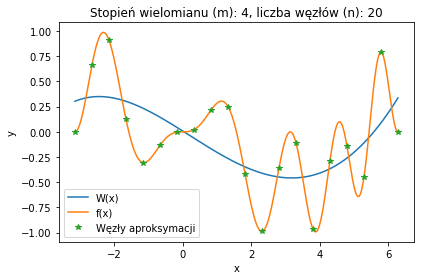

Stopień wielomianu (m): 4, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.016299132137844785
Błąd aproksymacji(norma maksimum): 0.6572608619206611


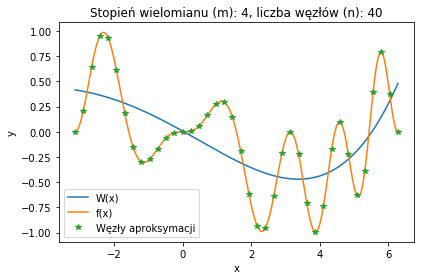

Stopień wielomianu (m): 4, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.016232692945373443
Błąd aproksymacji(norma maksimum): 0.6354712213650744


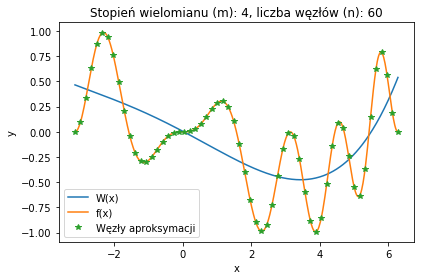

Stopień wielomianu (m): 5, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.016560103736769426
Błąd aproksymacji(norma maksimum): 0.6979019346900349


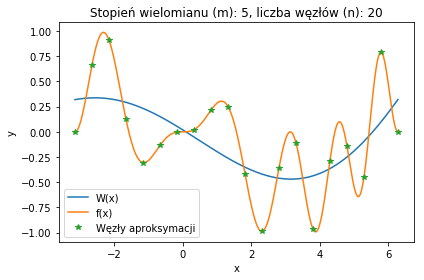

Stopień wielomianu (m): 5, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.016299320494375047
Błąd aproksymacji(norma maksimum): 0.6540094279518918


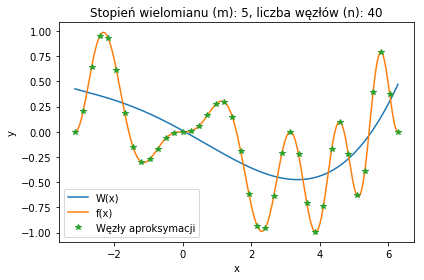

Stopień wielomianu (m): 5, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.01623278474367852
Błąd aproksymacji(norma maksimum): 0.6335070727890931


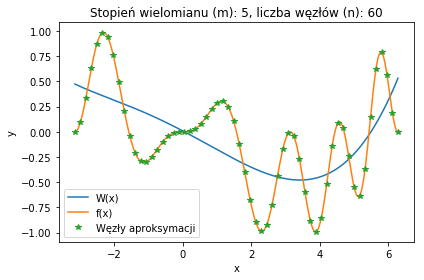

Stopień wielomianu (m): 6, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.014404215382738
Błąd aproksymacji(norma maksimum): 0.7119822450814439


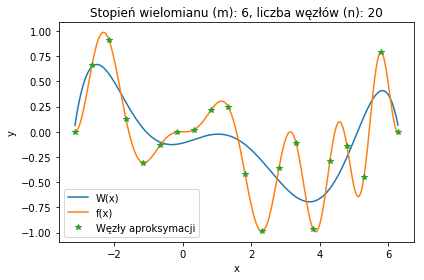

Stopień wielomianu (m): 6, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.014386856826390322
Błąd aproksymacji(norma maksimum): 0.7098722822708683


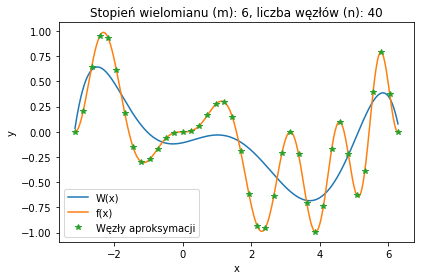

Stopień wielomianu (m): 6, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.0143859555490237
Błąd aproksymacji(norma maksimum): 0.7103706977399458


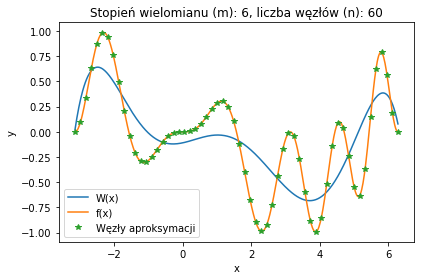

Stopień wielomianu (m): 7, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.013746597611380206
Błąd aproksymacji(norma maksimum): 0.6830564917769368


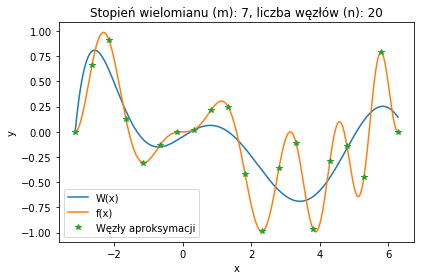

Stopień wielomianu (m): 7, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.01354878459601713
Błąd aproksymacji(norma maksimum): 0.661114370079051


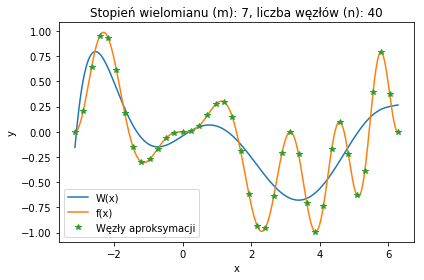

Stopień wielomianu (m): 7, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.013478803204761261
Błąd aproksymacji(norma maksimum): 0.6625224769363204


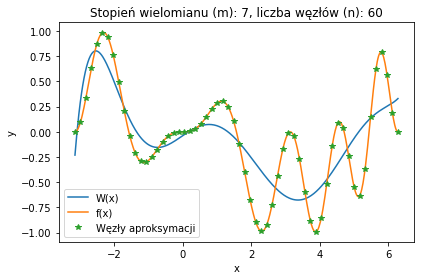

Stopień wielomianu (m): 8, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.013383457149848708
Błąd aproksymacji(norma maksimum): 0.5937909482749534


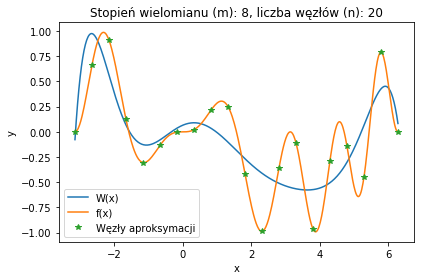

Stopień wielomianu (m): 8, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.013032994167761453
Błąd aproksymacji(norma maksimum): 0.5862068513357801


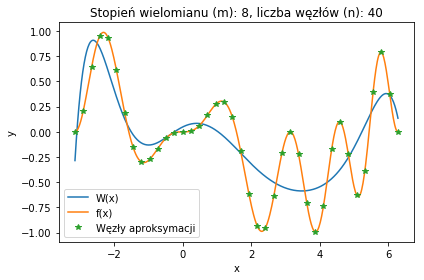

Stopień wielomianu (m): 8, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.012918500620522699
Błąd aproksymacji(norma maksimum): 0.5805938857322939


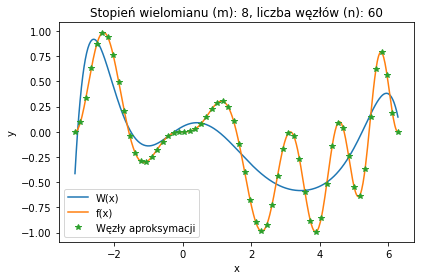

Stopień wielomianu (m): 9, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.011578529681175145
Błąd aproksymacji(norma maksimum): 0.633845335616049


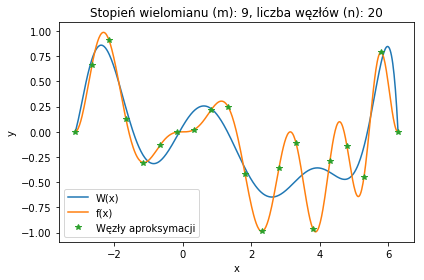

Stopień wielomianu (m): 9, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.011300148110170343
Błąd aproksymacji(norma maksimum): 0.6140542233646075


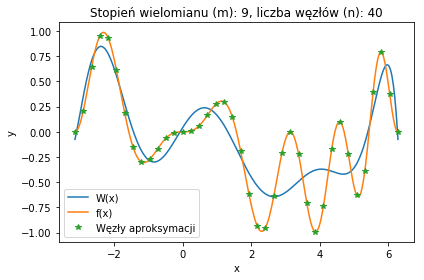

Stopień wielomianu (m): 9, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.01124629321073076
Błąd aproksymacji(norma maksimum): 0.6128488694708499


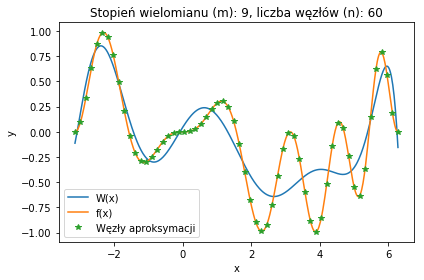

Stopień wielomianu (m): 10, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.011538271871817187
Błąd aproksymacji(norma maksimum): 0.6306844358585872


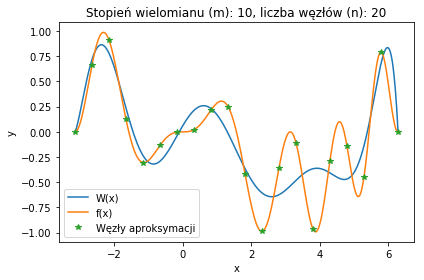

Stopień wielomianu (m): 10, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.011172546620368776
Błąd aproksymacji(norma maksimum): 0.585989799263951


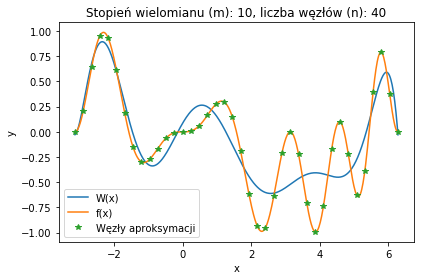

Stopień wielomianu (m): 10, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.011151710486300996
Błąd aproksymacji(norma maksimum): 0.5856992225186847


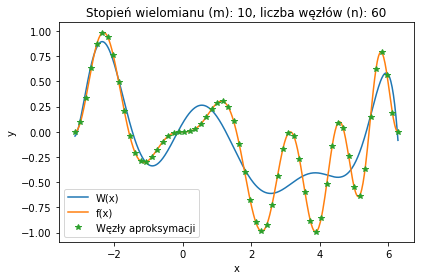

[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10] [20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60]
[(1, 20), (1, 40), (1, 60), (2, 20), (2, 40), (2, 60), (3, 20), (3, 40), (3, 60), (4, 20), (4, 40), (4, 60), (5, 20), (5, 40), (5, 60), (6, 20), (6, 40), (6, 60), (7, 20), (7, 40), (7, 60), (8, 20), (8, 40), (8, 60), (9, 20), (9, 40), (9, 60), (10, 20), (10, 40), (10, 60)]
MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [20, 40, 60]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])
Empty DataFrame
Columns: []
Index: [(1, 20), (1, 40), (1, 60), (2, 20), (2, 40), (2, 60), (3, 20), (3, 40), (3, 60), (4, 20), (4, 40), (4, 60), (5, 20), (5, 40), (5, 60), (6, 20), (6, 40), (6, 60), (7, 20), (7, 40), (7, 60), (8, 20), (8, 40

In [9]:
read_data()

Stopień wielomianu (m): 1, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.02033513767839565
Błąd aproksymacji(norma maksimum): 1.078776037580913


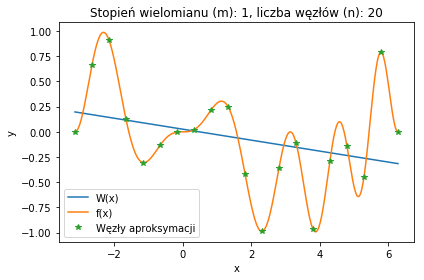

Stopień wielomianu (m): 1, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.02031532916744054
Błąd aproksymacji(norma maksimum): 1.0980124429801976


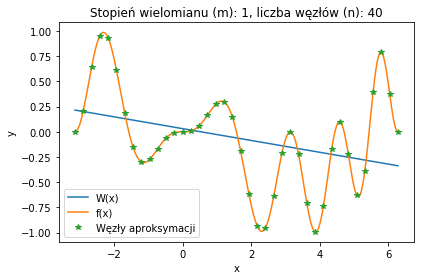

Stopień wielomianu (m): 1, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.02031148730588042
Błąd aproksymacji(norma maksimum): 1.1048296626508556


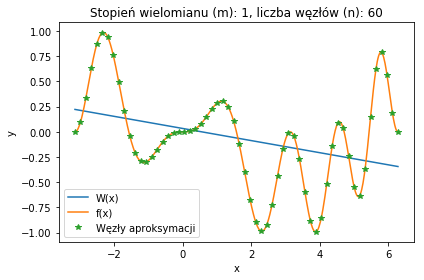

Stopień wielomianu (m): 2, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.01752515255169051
Błąd aproksymacji(norma maksimum): 0.8046789732881344


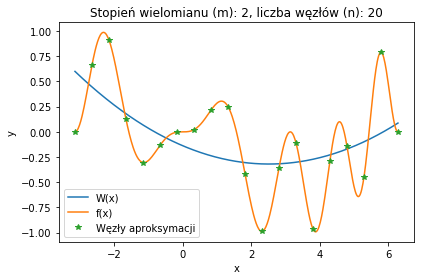

Stopień wielomianu (m): 2, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.017401223899400194
Błąd aproksymacji(norma maksimum): 0.7789595609584038


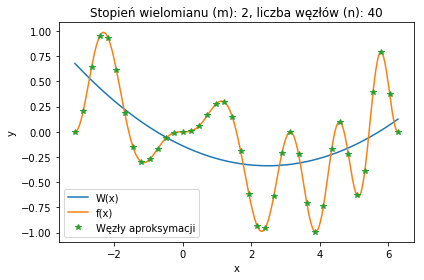

Stopień wielomianu (m): 2, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.017376979472195218
Błąd aproksymacji(norma maksimum): 0.7698393776246543


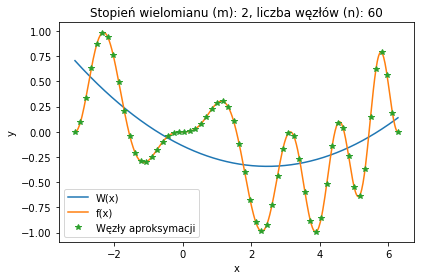

Stopień wielomianu (m): 3, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.016501813795510165
Błąd aproksymacji(norma maksimum): 0.710335703420224


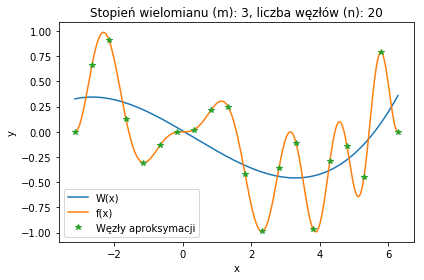

Stopień wielomianu (m): 3, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.01639040520592498
Błąd aproksymacji(norma maksimum): 0.6588710699715821


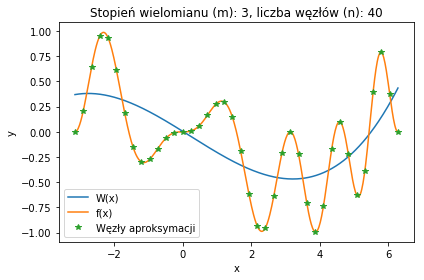

Stopień wielomianu (m): 3, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.016368839744097564
Błąd aproksymacji(norma maksimum): 0.6412106999042151


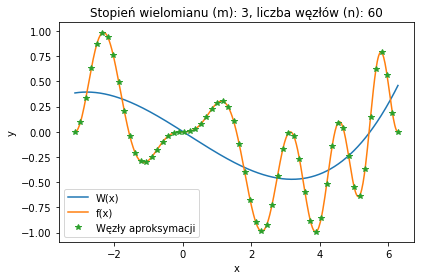

Stopień wielomianu (m): 4, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.016559745292613302
Błąd aproksymacji(norma maksimum): 0.7079651954037283


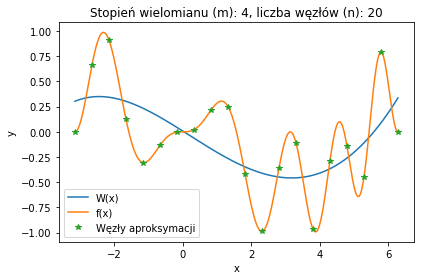

Stopień wielomianu (m): 4, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.016299132137844785
Błąd aproksymacji(norma maksimum): 0.6572608619206611


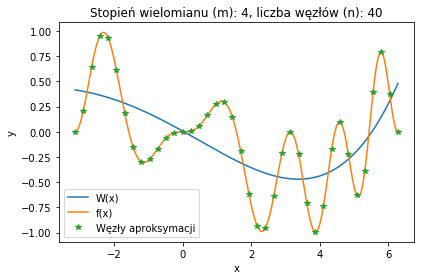

Stopień wielomianu (m): 4, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.016232692945373443
Błąd aproksymacji(norma maksimum): 0.6354712213650744


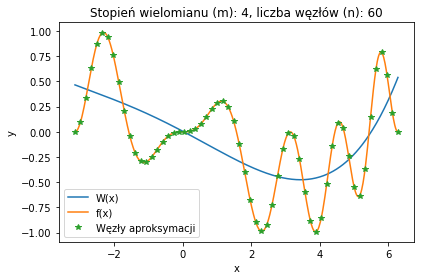

Stopień wielomianu (m): 5, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.016560103736769426
Błąd aproksymacji(norma maksimum): 0.6979019346900349


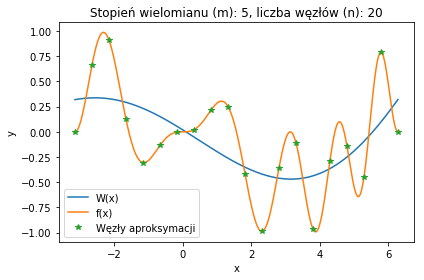

Stopień wielomianu (m): 5, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.016299320494375047
Błąd aproksymacji(norma maksimum): 0.6540094279518918


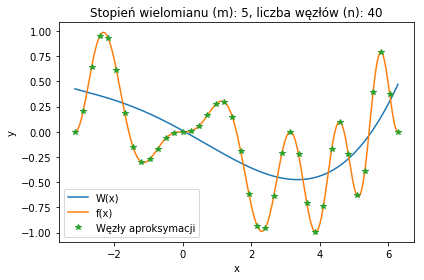

Stopień wielomianu (m): 5, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.01623278474367852
Błąd aproksymacji(norma maksimum): 0.6335070727890931


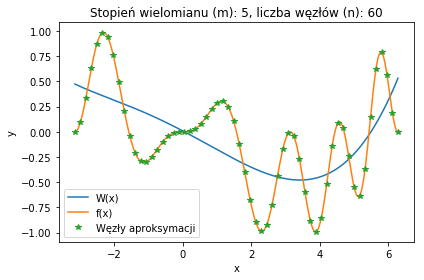

Stopień wielomianu (m): 6, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.014404215382738
Błąd aproksymacji(norma maksimum): 0.7119822450814439


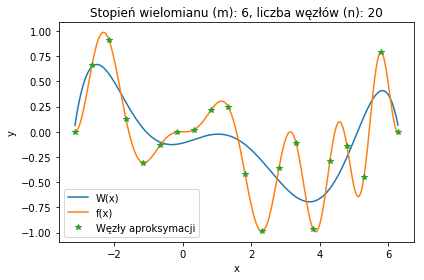

Stopień wielomianu (m): 6, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.014386856826390322
Błąd aproksymacji(norma maksimum): 0.7098722822708683


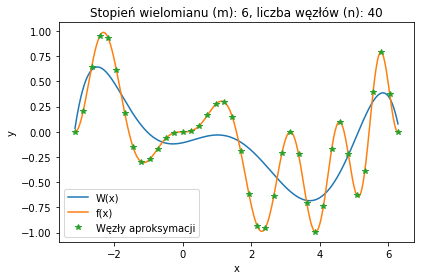

Stopień wielomianu (m): 6, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.0143859555490237
Błąd aproksymacji(norma maksimum): 0.7103706977399458


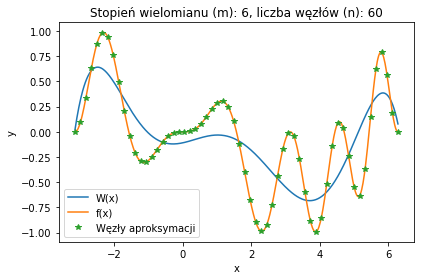

Stopień wielomianu (m): 7, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.013746597611380206
Błąd aproksymacji(norma maksimum): 0.6830564917769368


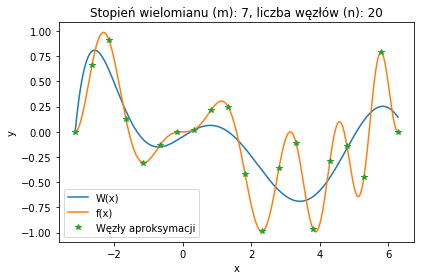

Stopień wielomianu (m): 7, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.01354878459601713
Błąd aproksymacji(norma maksimum): 0.661114370079051


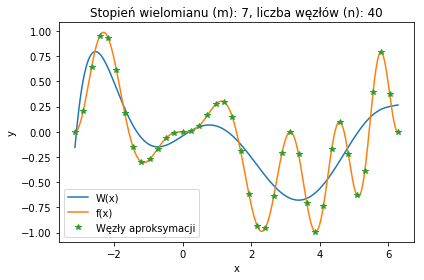

Stopień wielomianu (m): 7, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.013478803204761261
Błąd aproksymacji(norma maksimum): 0.6625224769363204


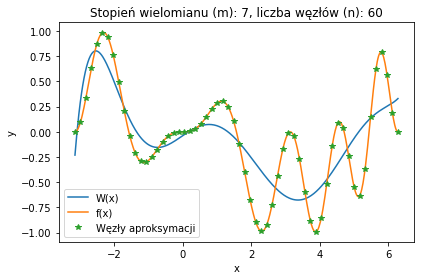

Stopień wielomianu (m): 8, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.013383457149848708
Błąd aproksymacji(norma maksimum): 0.5937909482749534


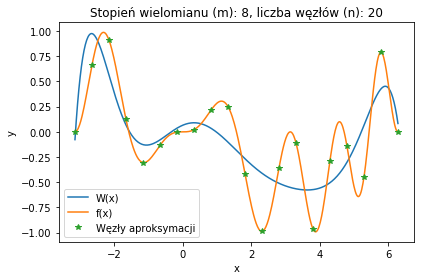

Stopień wielomianu (m): 8, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.013032994167761453
Błąd aproksymacji(norma maksimum): 0.5862068513357801


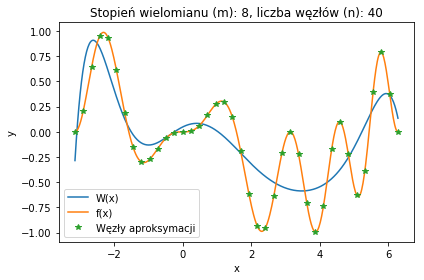

Stopień wielomianu (m): 8, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.012918500620522699
Błąd aproksymacji(norma maksimum): 0.5805938857322939


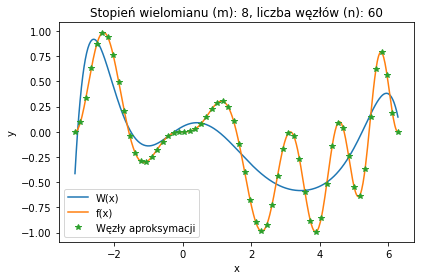

Stopień wielomianu (m): 9, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.011578529681175145
Błąd aproksymacji(norma maksimum): 0.633845335616049


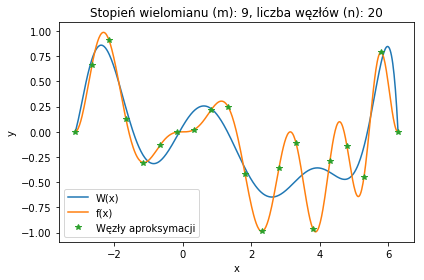

Stopień wielomianu (m): 9, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.011300148110170343
Błąd aproksymacji(norma maksimum): 0.6140542233646075


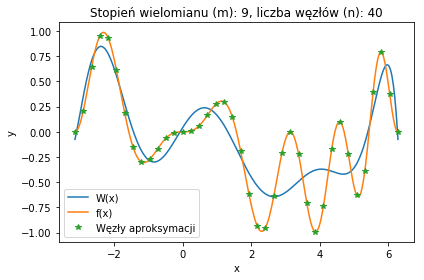

Stopień wielomianu (m): 9, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.01124629321073076
Błąd aproksymacji(norma maksimum): 0.6128488694708499


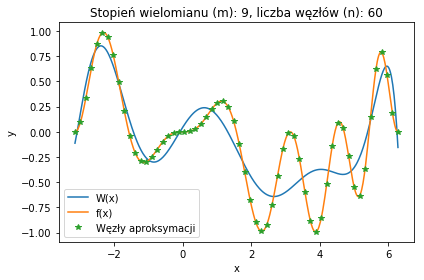

Stopień wielomianu (m): 10, liczba węzłów (n): 20
Błąd aproksymacji(norma euklidesowa): 0.011538271871817187
Błąd aproksymacji(norma maksimum): 0.6306844358585872


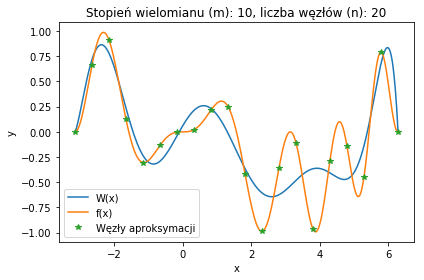

Stopień wielomianu (m): 10, liczba węzłów (n): 40
Błąd aproksymacji(norma euklidesowa): 0.011172546620368776
Błąd aproksymacji(norma maksimum): 0.585989799263951


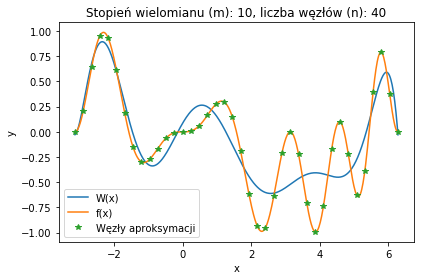

Stopień wielomianu (m): 10, liczba węzłów (n): 60
Błąd aproksymacji(norma euklidesowa): 0.011151710486300996
Błąd aproksymacji(norma maksimum): 0.5856992225186847


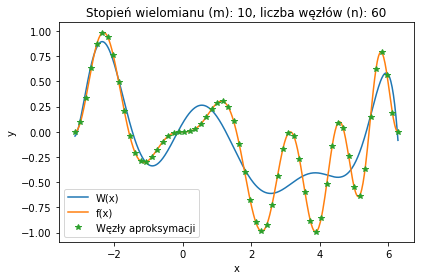

[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10] [20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60, 20, 40, 60]
[(1, 20), (1, 40), (1, 60), (2, 20), (2, 40), (2, 60), (3, 20), (3, 40), (3, 60), (4, 20), (4, 40), (4, 60), (5, 20), (5, 40), (5, 60), (6, 20), (6, 40), (6, 60), (7, 20), (7, 40), (7, 60), (8, 20), (8, 40), (8, 60), (9, 20), (9, 40), (9, 60), (10, 20), (10, 40), (10, 60)]
MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [20, 40, 60]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]])


Empty DataFrame
Columns: []
Index: [(1, 20), (1, 40), (1, 60), (2, 20), (2, 40), (2, 60), (3, 20), (3, 40), (3, 60), (4, 20), (4, 40), (4, 60), (5, 20), (5, 40), (5, 60), (6, 20), (6, 40), (6, 60), (7, 20), (7, 40), (7, 60), (8, 20), (8, 40), (8, 60), (9, 20), (9, 40), (9, 60), (10, 20), (10, 40), (10, 60)]

In [10]:
polynomial_errors = exercise_1()
# cubic = exercise_2()
polynomial_data = {}
outside = [] #list(polynomial_errors.keys())
for key in polynomial_errors[2]['Eukl'].keys():
    outside += list(polynomial_errors.keys())
outside.sort()
inside = []
for key in polynomial_errors.keys():
    inside += polynomial_errors[key]['Eukl'].keys()
hier_index = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
print(outside, inside)
print(list(zip(outside, inside)))
print(hier_index)
#for key in polynomial_errors.keys():
#    polynomial_data[key] = pd.DataFrame(polynomial_errors[key])
data['Polynomial'] = pd.DataFrame(polynomial_data, index=hier_index)
data['Polynomial']
# data['Cubic'] = pd.DataFrame(cubic)

In [14]:
data['Polynomial'] = pd.DataFrame(polynomial_errors, index=hier_index)
data['Polynomial']

1   2   3   4   5   6   7   8   9   10
1  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
5  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
6  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
7  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
8  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9  20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
10 20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   40 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
   60 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN

In [25]:
len(polynomial_errors)
polynomial_errors

{1: {'Eukl': {20: 0.02033513767839565,
   40: 0.02031532916744054,
   60: 0.02031148730588042},
  'Max': {20: 1.078776037580913,
   40: 1.0980124429801976,
   60: 1.1048296626508556}},
 2: {'Eukl': {20: 0.01752515255169051,
   40: 0.017401223899400194,
   60: 0.017376979472195218},
  'Max': {20: 0.8046789732881344,
   40: 0.7789595609584038,
   60: 0.7698393776246543}},
 3: {'Eukl': {20: 0.016501813795510165,
   40: 0.01639040520592498,
   60: 0.016368839744097564},
  'Max': {20: 0.710335703420224,
   40: 0.6588710699715821,
   60: 0.6412106999042151}},
 4: {'Eukl': {20: 0.016559745292613302,
   40: 0.016299132137844785,
   60: 0.016232692945373443},
  'Max': {20: 0.7079651954037283,
   40: 0.6572608619206611,
   60: 0.6354712213650744}},
 5: {'Eukl': {20: 0.016560103736769426,
   40: 0.016299320494375047,
   60: 0.01623278474367852},
  'Max': {20: 0.6979019346900349,
   40: 0.6540094279518918,
   60: 0.6335070727890931}},
 6: {'Eukl': {20: 0.014404215382738,
   40: 0.01438685682639032

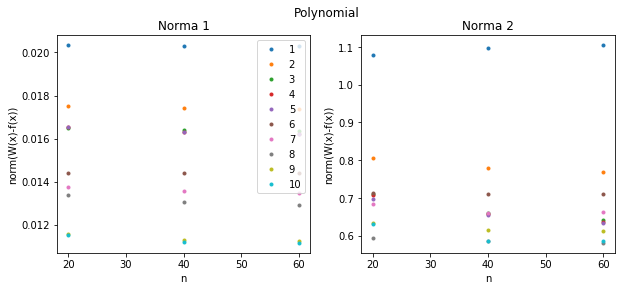

In [24]:
dic = polynomial_errors
x = dic[1]['Eukl'].keys()
#eukl = df['Eukl'].values
#max = df['Max'].values
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Polynomial')
for i in range(1, len(dic[i]['Eukl']) + 1):
    df = pd.DataFrame.from_dict(dic[i])
    axes[0].plot(x, df['Eukl'].values, '.', label=i)
    axes[1].plot(x, df['Max'].values, '.')
for i in range(2):
    axes[i].set_title('Norma ' + repr(i + 1))
    axes[i].set_xlabel('n')
    axes[i].set_ylabel('norm(W(x)-f(x))')
axes[0].legend()
plt.show()